<a href="https://colab.research.google.com/github/Chryron/CSC2516_NN-DL/blob/main/CSC2516_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

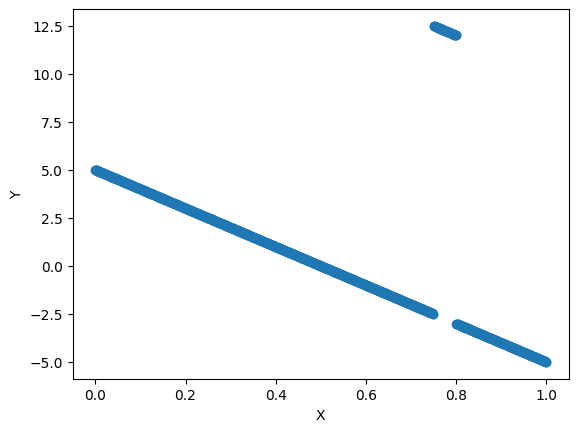

In [12]:
x, y = generate_data()
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

There is a sudden spike in y values between x=0.75 and x=0.8. The data is otherwise linear.

# 2. Implement linear regression (2.5 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

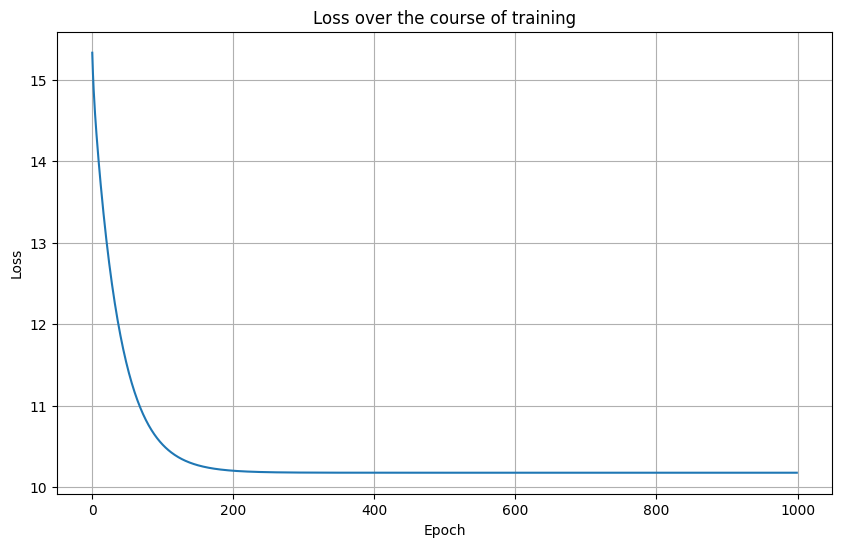

In [12]:
m = np.random.randn()
b = np.random.randn()
learning_rate = 0.1
num_epochs = 1000
losses = []

def squared_error_loss(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

for epoch in range(num_epochs):
    y_pred = m * x + b

    loss = squared_error_loss(y_pred, y)
    losses.append(loss)
    gradient_m = -2 * ((y - y_pred) * x).mean()
    gradient_b = -2 * (y - y_pred).mean()
    m -= learning_rate * gradient_m
    b -= learning_rate * gradient_b

# Plotting the loss over the course of training
plt.figure(figsize=(10,6))
plt.plot(losses)
plt.title("Loss over the course of training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


In [8]:
print(m, b)
# Plotting the data and the model's line
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=5, label="Data points")
plt.plot(x, m*x + b, color='red', label="Trained Model")
plt.title("Scatter plot with model's line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

NameError: name 'm' is not defined

# 4. "Robust" linear regression (1 point)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

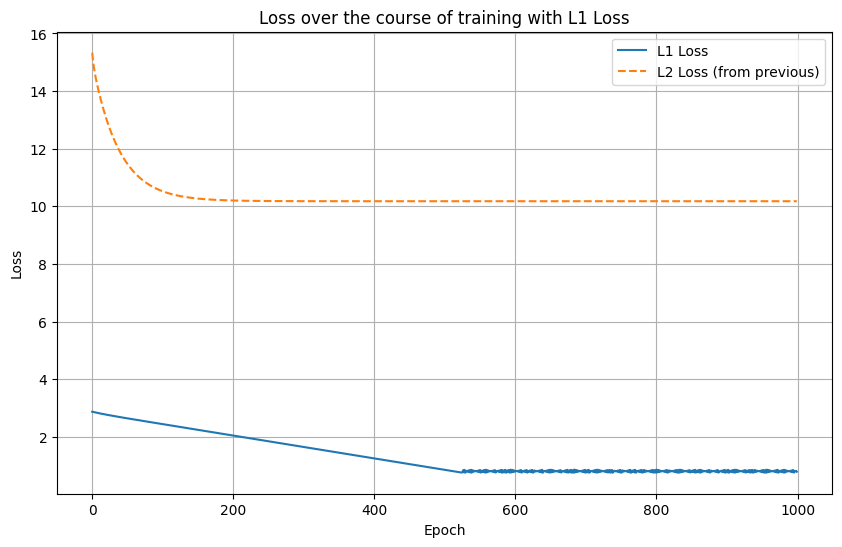

In [19]:
# Initialize model parameters and hyperparameters for L1 loss linear regression
m = np.random.randn()
b = np.random.randn()
learning_rate = 0.1
num_epochs = 1000
losses_L1 = []

# Define the L1 loss function (absolute difference)
def l1_loss(y_pred, y_true):
    return np.abs(y_pred - y_true).mean()

# Gradient descent to optimize the model with L1 loss
for epoch in range(num_epochs):
    y_pred = m*x + b

    # Compute the loss
    loss = l1_loss(y_pred, y)
    losses_L1.append(loss)

    # Compute the gradients
    gradient_m = -np.sign(y - y_pred) @ x / len(x)
    gradient_b = -np.sign(y - y_pred).mean()

    # Update model parameters
    m -= learning_rate * gradient_m
    b -= learning_rate * gradient_b

# Plotting the loss over the course of training
plt.figure(figsize=(10,6))
plt.plot(losses_L1, label="L1 Loss")
plt.plot(losses, linestyle='--', label="L2 Loss (from previous)")
plt.title("Loss over the course of training with L1 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?